# 1. Getting the data

First we import libraries and load the data, then we look at the shape and value counts.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
pwd

'/Users/majamielke/code/Cdennis51/Neurocheck/notebooks'

In [3]:
data = pd.read_csv('/Users/majamielke/code/Cdennis51/Neurocheck/raw_data/MEFAR_preprocessed/MEFAR_MID.csv')

In [4]:
data.head(5)

,BVP,EDA,TEMP,AccX,AccY,AccZ,HR,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Attention,Meditation,class
0,-0.150426,0.026215,0.778824,-0.325490,0.019608,0.388235,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0
1,-0.145506,0.026215,0.778824,-0.333333,-0.003922,0.388235,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0
2,-0.135576,0.026215,0.778824,-0.349020,-0.035294,0.333333,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0
3,-0.121047,0.026215,0.778824,-0.380392,-0.027451,0.356863,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0
4,-0.103369,0.026215,0.778824,-0.411765,-0.011765,0.411765,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0


In [5]:
data.columns

Index(['BVP', 'EDA', 'TEMP', 'AccX', 'AccY', 'AccZ', 'HR', ' Delta', ' Theta',
       ' Alpha1', ' Alpha2', ' Beta1', ' Beta2', ' Gamma1', ' Gamma2',
       ' Attention', ' Meditation', 'class'],
      dtype='object')

In [6]:
data.shape

(923298, 18)

In [7]:
data.isnull().sum()

BVP            0
EDA            0
TEMP           0
AccX           0
AccY           0
AccZ           0
HR             0
 Delta         0
 Theta         0
 Alpha1        0
 Alpha2        0
 Beta1         0
 Beta2         0
 Gamma1        0
 Gamma2        0
 Attention     0
 Meditation    0
class          0
dtype: int64

In [8]:
data.dtypes

BVP            float64
EDA            float64
TEMP           float64
AccX           float64
AccY           float64
AccZ           float64
HR             float64
 Delta         float64
 Theta         float64
 Alpha1        float64
 Alpha2        float64
 Beta1         float64
 Beta2         float64
 Gamma1        float64
 Gamma2        float64
 Attention     float64
 Meditation    float64
class          float64
dtype: object

In [9]:
data['class'].value_counts()

class
1.0    461649
0.0    461649
Name: count, dtype: int64

array([[<Axes: title={'center': 'BVP'}>, <Axes: title={'center': 'EDA'}>,
        <Axes: title={'center': 'TEMP'}>,
        <Axes: title={'center': 'AccX'}>],
       [<Axes: title={'center': 'AccY'}>,
        <Axes: title={'center': 'AccZ'}>, <Axes: title={'center': 'HR'}>,
        <Axes: title={'center': ' Delta'}>],
       [<Axes: title={'center': ' Theta'}>,
        <Axes: title={'center': ' Alpha1'}>,
        <Axes: title={'center': ' Alpha2'}>,
        <Axes: title={'center': ' Beta1'}>],
       [<Axes: title={'center': ' Beta2'}>,
        <Axes: title={'center': ' Gamma1'}>,
        <Axes: title={'center': ' Gamma2'}>,
        <Axes: title={'center': ' Attention'}>],
       [<Axes: title={'center': ' Meditation'}>,
        <Axes: title={'center': 'class'}>, <Axes: >, <Axes: >]],
      dtype=object)

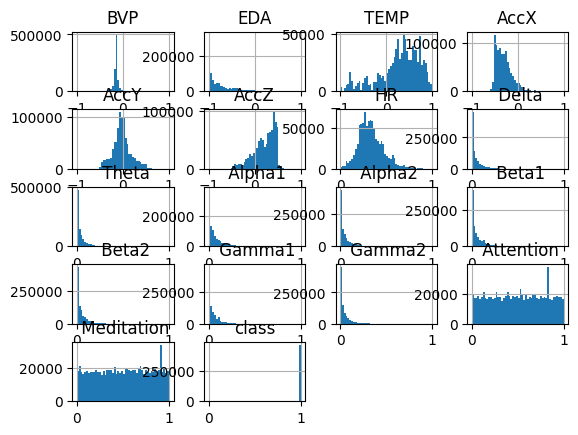

In [10]:
data.hist(bins = 50)

# 2. Train/test split and preparation for modeling

In [11]:
X = data.drop(columns = ['class'])
y = data['class']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

For Classification: Logistic Regression, Support Vector Machines (SVM), k-Nearest Neighbors (k-NN), Neural Networks.

## Scaling

We're choosing a robust scaler just to be sure. No imputing needed because no missing values, therefore we're just fitting and transforming the scaler instead of adding a preprocessing pipeline step.

In [14]:
from sklearn.preprocessing import RobustScaler

In [15]:
robust_scaler = RobustScaler()

In [16]:
X_train_scaled = robust_scaler.fit_transform(X_train)

In [17]:
X_test_scaled = robust_scaler.transform(X_test)

# 3. Modeling

## First attempt to get a baseline with Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [19]:
log_reg = LogisticRegression(random_state = 0)

In [20]:
cv_log_reg = cross_validate(log_reg, X_train_scaled, y_train, cv = 5, scoring = ['accuracy','precision', 'recall'])

In [21]:
cv_log_reg

{'fit_time': array([0.17928386, 0.161237  , 0.16310501, 0.17624807, 0.16304588]),
 'score_time': array([0.01929903, 0.01852894, 0.01823902, 0.01861   , 0.01828289]),
 'test_accuracy': array([0.63576302, 0.63861769, 0.63926753, 0.63685876, 0.63658799]),
 'test_precision': array([0.67187469, 0.673567  , 0.67649999, 0.67325841, 0.67283794]),
 'test_recall': array([0.53088693, 0.53811167, 0.53394288, 0.53197809, 0.53188527])}

In [22]:
cv_log_reg['test_precision'].mean()

np.float64(0.6736076063316409)

In [23]:
cv_log_reg['test_accuracy'].mean()

np.float64(0.6374189993141794)

In [24]:
cv_log_reg['test_recall'].mean()

np.float64(0.5333609672372531)

### Fit and score

In [25]:
log_reg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [26]:
log_reg.score(X_test, y_test)

0.6392902270840103

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
logreg_score = cross_val_score(log_reg, X_train_scaled, y_train, cv = 5, scoring = 'accuracy')

In [29]:
logreg_score.mean()

np.float64(0.6374189993141794)

## Gridsearch & SVM

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

### We'll make mini-datasets for gridsearch

In [55]:
# Filter data on class = 1
class_1 = data[data['class'] ==1].sample(5000)

# Filter data on class = 0
class_0 = data[data['class'] ==0].sample(5000)

# combine them into 10000 rows
data_mini = pd.concat([class_1,class_0])

# separate X and y
X_mini = data_mini.drop(columns = ['class'])
y_mini = data_mini['class']


#scale x mini
X_mini_scaled = robust_scaler.transform(X_mini)

In [31]:
svc = SVC()

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
# Expanded parameter distributions for RandomizedSearchCV
param_distributions = {
    'C': np.logspace(-2, 3, 50),  # 50 values between 0.01 and 1000
    'kernel': ['linear', 'rbf'],
    'gamma': np.logspace(-4, -1, 20)  # 20 values between 0.0001 and 0.1
}

In [48]:
svc_random = RandomizedSearchCV(
    svc,
    param_distributions,
    n_iter=20,  # Try 20 random combinations
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [56]:
svc_random.fit(X_mini_scaled,y_mini)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


,estimator,SVC()
,param_distributions,"{'C': array([1.0000...00000000e+03]), 'gamma': array([0.0001..., 0.1 ]), 'kernel': ['linear', 'rbf']}"
,n_iter,20
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [57]:
svc_random.best_params_

{'kernel': 'rbf',
 'gamma': np.float64(0.023357214690901212),
 'C': np.float64(1.3894954943731375)}

In [68]:
svc_random.best_score_

np.float64(0.6963001639096124)

In [72]:
param_grid ={
    'C': [0.5,0.8,1,1.3,1.4,1.6],
   'kernel': ['rbf'],
   'gamma': [0.01,0.02,0.03]
  }

In [73]:
svc_search = GridSearchCV(
    svc,
    param_grid,
    cv =3,
    n_jobs = -1,
verbose =1)

In [61]:
svc_search

,estimator,SVC()
,param_grid,"{'C': array([ 3.16...100. ]), 'gamma': array([1.0232..., 1.25892541]), 'kernel': ['linear', 'rbf']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1.0


In [74]:
svc_search.fit(X_mini_scaled, y_mini)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


,estimator,SVC()
,param_grid,"{'C': [0.5, 0.8, ...], 'gamma': [0.01, 0.02, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1.6


In [76]:
svc_search.best_params_

{'C': 1.6, 'gamma': 0.03, 'kernel': 'rbf'}

In [77]:
svc_search.best_score_

np.float64(0.7078002341325914)

# Let's try KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier()

In [92]:
# Hyperparameter Grid
grid = {'n_neighbors' : [1,5,10,20,50]}


# Instantiate Grid Search
search = GridSearchCV(knn,grid,scoring = 'accuracy',cv = 5,n_jobs=-1)


# Fit data to Grid Search
search.fit(X_mini_scaled, y_mini)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [1, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,1


In [93]:
search.best_params_

{'n_neighbors': 1}

In [94]:
search.best_score_

np.float64(0.7413)

Ok, not bad but let's try ensemble methods

# Ensemble methods